In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('diabetes.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.shape

(768, 9)

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

As there were many variables with 0 values and that doesn't make sense

# EDA

In [8]:
df.isna().sum()# there is no null values

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

# Missing Value Treatment

# Glucose

In [9]:
gl=df.groupby(['Outcome'])['Glucose'].transform('median')

In [10]:
df.Glucose=np.where(df.Glucose.isnull(), gl , df.Glucose)

# BloodPressure

In [11]:
df[df['BloodPressure'].isna()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
15,7,100.0,NaN,NaN,NaN,30.0,0.484,32,1
49,7,105.0,NaN,NaN,NaN,NaN,0.305,24,0
60,2,84.0,NaN,NaN,NaN,NaN,0.304,21,0
78,0,131.0,NaN,NaN,NaN,43.2,0.270,26,1
81,2,74.0,NaN,NaN,NaN,NaN,0.102,22,0
172,2,87.0,NaN,23.0,NaN,28.9,0.773,25,0
193,11,135.0,NaN,NaN,NaN,52.3,0.578,40,1
222,7,119.0,NaN,NaN,NaN,25.2,0.209,37,0
261,3,141.0,NaN,NaN,NaN,30.0,0.761,27,1


In [12]:
bp=df.groupby(['Outcome'])['BloodPressure'].transform('mean')

In [13]:
df.BloodPressure=np.where(df.BloodPressure.isnull(), gl , df.BloodPressure)


# Body Mass Index

In [14]:
df[df["BMI"].isna()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1
49,7,105.0,107.0,NaN,NaN,NaN,0.305,24,0
60,2,84.0,107.0,NaN,NaN,NaN,0.304,21,0
81,2,74.0,107.0,NaN,NaN,NaN,0.102,22,0
145,0,102.0,75.0,23.0,NaN,NaN,0.572,21,0
371,0,118.0,64.0,23.0,89.0,NaN,1.731,21,0
426,0,94.0,107.0,NaN,NaN,NaN,0.256,25,0
494,3,80.0,107.0,NaN,NaN,NaN,0.174,22,0
522,6,114.0,107.0,NaN,NaN,NaN,0.189,26,0
684,5,136.0,82.0,NaN,NaN,NaN,0.640,69,0


In [15]:
bm=df.groupby(['Outcome'])['BloodPressure'].transform('median')

In [16]:
df.BMI=np.where(df.BMI.isnull(), bm , df.BMI)

# Skin Thickness

In [17]:
sk=df.groupby(['Outcome'])['SkinThickness'].transform('median')

In [18]:
df.SkinThickness=np.where(df.SkinThickness.isnull(), bm , df.SkinThickness)

# Insulin

In [19]:
df.Insulin.isna().sum() # we can drop the insulin column as it has high null values and hardly have any impact on the outcome

374

In [20]:
for x in df:
    print(df.groupby('Outcome')[x].mean())

Outcome
0    3.298000
1    4.865672
Name: Pregnancies, dtype: float64
Outcome
0    110.622000
1    142.302239
Name: Glucose, dtype: float64
Outcome
0    72.250000
1    79.182836
Name: BloodPressure, dtype: float64
Outcome
0    39.680000
1    47.119403
Name: SkinThickness, dtype: float64
Outcome
0    130.287879
1    206.846154
Name: Insulin, dtype: float64
Outcome
0    31.600200
1    35.709701
Name: BMI, dtype: float64
Outcome
0    0.429734
1    0.550500
Name: DiabetesPedigreeFunction, dtype: float64
Outcome
0    31.190000
1    37.067164
Name: Age, dtype: float64
Outcome
0    0
1    1
Name: Outcome, dtype: int64


as we can see there is hardly any difference with the outcome type and skin thickness and glucose plays a major role in it

# EDA

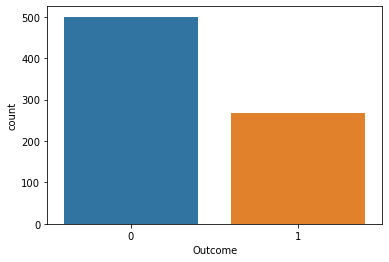

In [21]:
sns.countplot(x=df["Outcome"])#we can see clearly that it is an imbalance problem

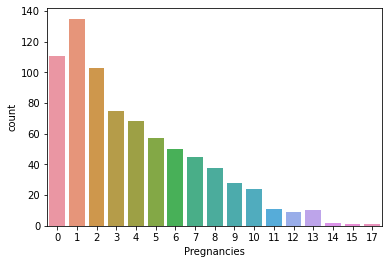

In [22]:
sns.countplot(df.Pregnancies)

Text(0.5, 1.0, 'Pregana:Outcome Vs Pregana')

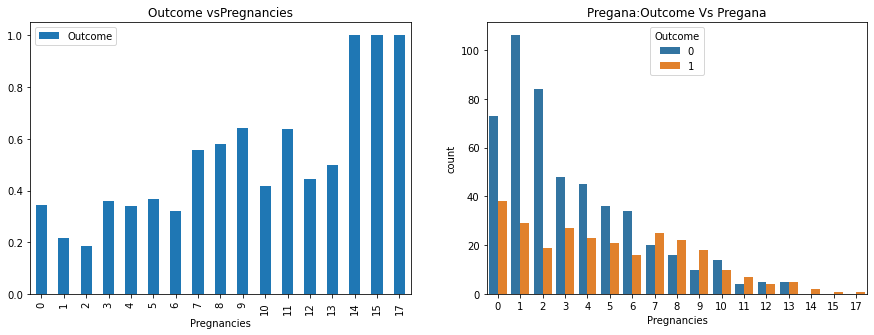

In [23]:
f,ax=plt.subplots(1,2,figsize=(15,5))

df[['Pregnancies','Outcome']].groupby(['Pregnancies']).mean().plot.bar(ax=ax[0]) #mean gives the %outcome
ax[0].set_title('Outcome vsPregnancies')

#a side by side bar countplot on sex 
sns.countplot('Pregnancies',hue='Outcome',data=df,ax=ax[1])
ax[1].set_title('Pregana:Outcome Vs Pregana')

# Outlier Detection

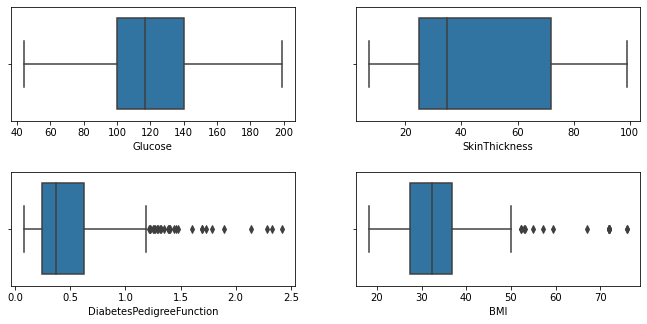

In [24]:
f,ax=plt.subplots(2,2,figsize=(10,5))
plt.tight_layout(pad=3.0)
sns.boxplot(df.Glucose,ax=ax[0,0])


sns.boxplot(df.SkinThickness,ax=ax[0,1])


sns.boxplot(df.DiabetesPedigreeFunction,ax=ax[1,0])

sns.boxplot(df.BMI,ax=ax[1,1])



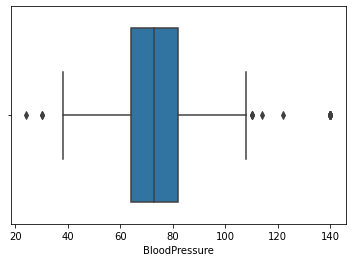

In [25]:
sns.boxplot(df.BloodPressure)

In [26]:
# we can see that BMI and Diabetespedegree has high number of outliers so the data is skewed

In [27]:
df.DiabetesPedigreeFunction=np.log(df.DiabetesPedigreeFunction)

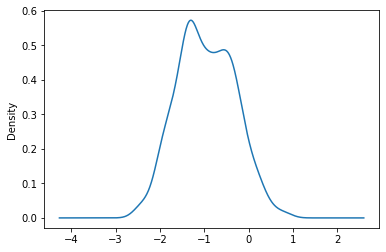

In [28]:
df.DiabetesPedigreeFunction.plot(kind='kde')

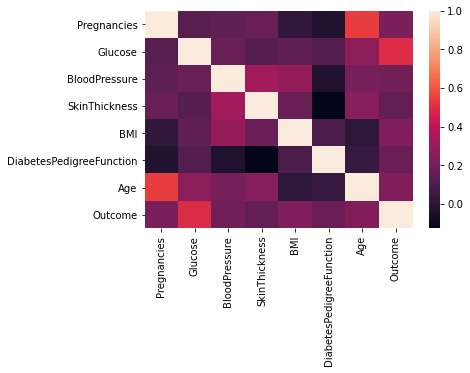

In [95]:
sns.heatmap(df.corr())

# PCA for Feature Reduction

In [29]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [30]:
df.drop('Insulin',axis=1,inplace=True)

In [31]:
df.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,33.6,-0.466809,50,1


In [32]:
X=df.iloc[:,1:7]
X

,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age
0,148.0,72.0,35.0,33.6,-0.466809,50
1,85.0,66.0,29.0,26.6,-1.046969,31
2,183.0,64.0,76.0,23.3,-0.397497,32
3,89.0,66.0,23.0,28.1,-1.789761,21
4,137.0,40.0,35.0,43.1,0.827678,33
...,...,...,...,...,...,...
763,101.0,76.0,48.0,32.9,-1.766092,63
764,122.0,70.0,27.0,36.8,-1.078810,27
765,121.0,72.0,23.0,26.2,-1.406497,30
766,126.0,60.0,76.0,30.1,-1.052683,47


In [33]:
scalar= StandardScaler()

pca = PCA()
pipe=Pipeline(steps=[('scalar', StandardScaler()), ('pca', PCA())])

In [34]:
X = pd.DataFrame(scalar.fit_transform(X),columns=X.columns)
X

,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age
0,0.864625,-0.163724,-0.329132,0.067556,0.765848,1.425995
1,-1.204727,-0.531745,-0.600543,-0.768302,-0.135159,-0.190672
2,2.014265,-0.654418,1.525506,-1.162349,0.873492,-0.105584
3,-1.073339,-0.531745,-0.871953,-0.589190,-1.288739,-1.041549
4,0.503310,-2.126501,-0.329132,1.201934,2.776227,-0.020496
...,...,...,...,...,...,...
763,-0.679177,0.081623,0.258924,-0.016030,-1.251979,2.532136
764,0.010607,-0.286398,-0.691013,0.449662,-0.184608,-0.531023
765,-0.022240,-0.163724,-0.871953,-0.816065,-0.693517,-0.275760
766,0.141994,-0.899766,1.525506,-0.350373,-0.144033,1.170732


In [51]:
Y=df.loc[:,'Outcome']
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [35]:
X.mean(),X.std()

(Glucose                     1.604619e-16
 BloodPressure               2.949753e-16
 SkinThickness               6.808790e-17
 BMI                         9.439787e-17
 DiabetesPedigreeFunction    2.083837e-16
 Age                         1.857600e-16
 dtype: float64,
 Glucose                     1.000652
 BloodPressure               1.000652
 SkinThickness               1.000652
 BMI                         1.000652
 DiabetesPedigreeFunction    1.000652
 Age                         1.000652
 dtype: float64)

In [36]:
pca.fit(X)

PCA()

In [37]:
pca.components_

array([[ 0.40253843,  0.52705792,  0.48380014,  0.37840224,  0.02798989,
         0.42677687],
       [ 0.39378428, -0.14860854, -0.38932516,  0.17514662,  0.79906556,
         0.0457521 ],
       [-0.29691863,  0.24701425, -0.0172283 ,  0.68310321,  0.06939237,
        -0.61569569],
       [-0.70882077,  0.12978289,  0.30186613, -0.15809629,  0.53966866,
         0.27086836],
       [-0.12299609,  0.70486715, -0.65128795, -0.18015587, -0.09470861,
         0.14977454],
       [-0.27781497, -0.35415831, -0.31427278,  0.54959516, -0.23597355,
         0.58385357]])

In [38]:
pca_loadings = pd.DataFrame(pca.components_,index = ['PC1','PC2','PC3','PC4', 'PC5','PC6'],columns=X.columns)
pca_loadings

,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age
PC1,0.402538,0.527058,0.483800,0.378402,0.027990,0.426777
PC2,0.393784,-0.148609,-0.389325,0.175147,0.799066,0.045752
PC3,-0.296919,0.247014,-0.017228,0.683103,0.069392,-0.615696
PC4,-0.708821,0.129783,0.301866,-0.158096,0.539669,0.270868
PC5,-0.122996,0.704867,-0.651288,-0.180156,-0.094709,0.149775
PC6,-0.277815,-0.354158,-0.314273,0.549595,-0.235974,0.583854


In [39]:
pca.explained_variance_ratio_

array([0.30240554, 0.19164723, 0.17337751, 0.12616262, 0.10725595,
       0.09915116])

In [61]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=5)
kf.split(X,Y)

<generator object _BaseKFold.split at 0x000001A488DD4C80>

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size = 0.3, random_state=2)

In [106]:
lr=LogisticRegression(random_state=2, n_jobs=-1,class_weight={0:500*(500+268)/500*2,1:268*(500+268)/268*2})
dt=DecisionTreeClassifier(max_depth=3)
rf=RandomForestClassifier()


In [72]:
results_kfold =cross_val_score(lr, X, Y, cv=kf)
results_kfold.mean()

0.7643918173329938

In [76]:
lr.fit(X_train,y_train)

LogisticRegression(class_weight={0: 1536.0, 1: 1536.0}, n_jobs=-1,
                   random_state=2)

In [77]:
yp=lr.predict(X_test)

In [79]:
lr.score(X_test,y_test)

0.7532467532467533

In [80]:
yp

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0], dtype=int64)

In [81]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, classification_report, recall_score

In [82]:
print(classification_report(y_test, yp))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       155
           1       0.67      0.49      0.56        76

    accuracy                           0.75       231
   macro avg       0.73      0.69      0.70       231
weighted avg       0.74      0.75      0.74       231



In [83]:
able = pd.DataFrame(pd.crosstab(y_test,yp))

In [86]:
137/(137+18)

0.8838709677419355

In [87]:
137/(137+39)

0.7784090909090909

In [84]:
able

col_0,0,1
Outcome,,
0,137,18
1,39,37


In [88]:
lr.get_params

<bound method BaseEstimator.get_params of LogisticRegression(class_weight={0: 1536.0, 1: 1536.0}, n_jobs=-1,
                   random_state=2)>

# Decision Trees


In [90]:
f1_sc = []
for depth in np.arange(2,10):
    dt = DecisionTreeClassifier(class_weight={0:500*(500+268)/500*2,1:268*(500+268)/268*2}, max_depth=depth, random_state=10)
    dt.fit(X_train, y_train)
    f1_sc.append(f1_score(y_test, dt.predict(X_test), average = 'weighted'))

In [91]:
pd.DataFrame({'depth': np.arange(2,10),'f1_score':f1_sc})

,depth,f1_score
0,2,0.803687
1,3,0.806457
2,4,0.806457
3,5,0.805185
4,6,0.827476
5,7,0.838374
6,8,0.841787
7,9,0.815418


In [107]:
params = {'max_features': [2,3,4,5,6],
         'criterion':['gini','entropy'],
         'min_samples_leaf': [.01,.1,.2,.3], 
         'min_samples_split': [.01, .1,.2,.3]}

In [108]:
from sklearn.model_selection import GridSearchCV

In [109]:
gs = GridSearchCV(dt, param_grid=params, scoring="f1_weighted", cv = 3)

In [110]:
gs.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(max_depth=3),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': [2, 3, 4, 5, 6],
                         'min_samples_leaf': [0.01, 0.1, 0.2, 0.3],
                         'min_samples_split': [0.01, 0.1, 0.2, 0.3]},
             scoring='f1_weighted')

In [111]:
gs.best_params_

{'criterion': 'entropy',
 'max_features': 5,
 'min_samples_leaf': 0.01,
 'min_samples_split': 0.2}

In [112]:
gs.best_score_

0.8352312328762487